In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
steam = pd.read_csv("clean_data/steam_for_model.csv")

In [3]:
steam.head()

,appid,name,release_date,developer,publisher,free_to_play,virtual_reality_support,controller_support,steam_workshop,singleplayer,...,steamspy_tags,achievements,general_rating,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,total_reviews
0,730,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,True,False,Full,True,False,...,FPS;Multiplayer;Shooter,167,Positive,2644404,402313,22494,6502,50M to 100M,0.00,3046717
1,570,Dota 2,2013-07-09,Valve,Valve,True,False,No,True,False,...,Free to Play;MOBA;Strategy,0,Positive,863507,142079,23944,801,100M to 200M,0.00,1005586
2,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,PUBG Corporation,PUBG Corporation,False,False,No,False,False,...,Survival;Shooter;Multiplayer,37,Mixed,496184,487076,22938,12434,50M to 100M,26.99,983260
3,440,Team Fortress 2,2007-10-10,Valve,Valve,True,False,No,True,False,...,Free to Play;Multiplayer;FPS,520,Positive,515879,34036,8495,623,20M to 50M,0.00,549915
4,271590,Grand Theft Auto V,2015-04-13,Rockstar North,Rockstar Games,False,False,Full,False,True,...,Open World;Action;Multiplayer,77,Mostly Positive,329061,139308,9837,4834,10M to 20M,24.99,468369


In [4]:
steam.corr()

,appid,free_to_play,virtual_reality_support,steam_workshop,singleplayer,multiplayer,is_open_world,is_rogue_like,is_metroidvania,is_visual_novel,...,linux_support,is_positive,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,total_reviews
appid,1.000000,0.044071,0.071224,-0.093728,-0.007595,-0.137124,-0.098362,-0.042567,-0.018349,-0.010503,...,-0.142714,-0.219517,-0.089262,0.042704,-0.071023,-0.052141,-0.072023,-0.050460,-0.149852,-0.070090
free_to_play,0.044071,1.000000,0.023786,-0.011300,-0.234156,0.140699,-0.010561,-0.011396,-0.008688,0.012276,...,-0.025074,0.073940,-0.009551,-0.014252,0.046370,0.042089,0.068745,0.050221,-0.199098,0.047298
virtual_reality_support,0.071224,0.023786,1.000000,-0.034562,-0.004280,-0.040482,-0.021596,-0.013681,-0.011916,-0.036417,...,-0.122704,-0.032359,-0.019714,-0.026471,-0.012467,-0.011789,-0.019898,-0.014975,0.003048,-0.012807
steam_workshop,-0.093728,-0.011300,-0.034562,1.000000,-0.040901,0.102778,0.037113,0.025358,0.005101,-0.026184,...,0.096165,0.130460,0.006819,0.000131,0.093455,0.059309,0.049450,0.026860,0.105163,0.090451
singleplayer,-0.007595,-0.234156,-0.004280,-0.040901,1.000000,-0.345381,-0.024368,0.014515,0.010693,0.031442,...,0.023134,-0.045914,0.010935,0.017788,-0.054510,-0.070335,-0.039948,-0.027436,0.006603,-0.059586
multiplayer,-0.137124,0.140699,-0.040482,0.102778,-0.345381,1.000000,0.064951,-0.006360,-0.016212,-0.073896,...,0.016366,0.126202,0.023218,-0.029006,0.055294,0.061460,0.048208,0.030721,0.124884,0.058554
is_open_world,-0.098362,-0.010561,-0.021596,0.037113,-0.024368,0.064951,1.000000,-0.005982,-0.004407,-0.013469,...,-0.013491,0.178903,0.133583,-0.004516,0.070134,0.085813,0.067445,0.041517,0.125060,0.075770
is_rogue_like,-0.042567,-0.011396,-0.013681,0.025358,0.014515,-0.006360,-0.005982,1.000000,0.010339,-0.008764,...,0.059116,0.038215,-0.005195,0.002410,0.009177,0.000912,0.012068,0.009656,0.010406,0.007943
is_metroidvania,-0.018349,-0.008688,-0.011916,0.005101,0.010693,-0.016212,-0.004407,0.010339,1.000000,-0.006456,...,0.026862,0.042557,-0.001339,-0.002217,0.002804,-0.000417,0.001075,0.001724,0.020616,0.002294
is_visual_novel,-0.010503,0.012276,-0.036417,-0.026184,0.031442,-0.073896,-0.013469,-0.008764,-0.006456,1.000000,...,0.105287,-0.003587,0.040751,-0.013208,-0.002419,-0.005155,-0.001147,0.000042,0.049440,-0.003033


In [5]:
steam.corr().is_positive.sort_values(ascending = False)

is_positive                1.000000
is_open_world              0.178903
price                      0.178237
required_age               0.164276
steam_workshop             0.130460
positive_ratings           0.129928
total_reviews              0.127721
multiplayer                0.126202
is_shooter                 0.120535
average_playtime           0.107353
negative_ratings           0.092765
has_great_soundtrack       0.078927
mac_support                0.078048
linux_support              0.077251
free_to_play               0.073940
median_playtime            0.062814
is_metroidvania            0.042557
is_rogue_like              0.038215
has_female_protagonist     0.032047
is_rpg                     0.028385
windows_support            0.004950
is_visual_novel           -0.003587
achievements              -0.009565
is_sports                 -0.010206
is_simulation             -0.016943
virtual_reality_support   -0.032359
singleplayer              -0.045914
appid                     -0

number of ratings is probably not worth keeping in this case - Also don't really need stuff like name and release date

In [6]:
steam_model_base = steam.drop(["appid", "positive_ratings", "negative_ratings", "total_reviews", "general_rating", "name", "release_date",
           "developer", "publisher","categories", "genres", "steamspy_tags", "owners", "average_playtime", "median_playtime", "price", "required_age", "achievements"], axis = "columns").copy()

In [7]:
steam_model_base = pd.get_dummies(steam_model_base, drop_first = True)

In [8]:
steam_model_base

,free_to_play,virtual_reality_support,steam_workshop,singleplayer,multiplayer,is_open_world,is_rogue_like,is_metroidvania,is_visual_novel,has_great_soundtrack,is_shooter,is_rpg,has_female_protagonist,is_sports,is_simulation,windows_support,mac_support,linux_support,is_positive,controller_support_No
0,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,True,True,True,0
1,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,True,True,1
2,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,1
3,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,True,True,True,1
4,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26559,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,1
26560,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1
26561,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,1
26562,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0


In [9]:
model_pred = steam_model_base.drop(columns = "is_positive").copy()

In [10]:
model_resp = steam_model_base["is_positive"].copy()

In [11]:
model_pred

,free_to_play,virtual_reality_support,steam_workshop,singleplayer,multiplayer,is_open_world,is_rogue_like,is_metroidvania,is_visual_novel,has_great_soundtrack,is_shooter,is_rpg,has_female_protagonist,is_sports,is_simulation,windows_support,mac_support,linux_support,controller_support_No
0,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,True,True,0
1,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,True,1
2,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,1
3,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,True,True,1
4,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26559,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,1
26560,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,1
26561,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,1
26562,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0


In [12]:
model_resp

0         True
1         True
2        False
3         True
4         True
         ...  
26559     True
26560    False
26561     True
26562    False
26563     True
Name: is_positive, Length: 26564, dtype: bool

In [13]:
steam_pred_train, steam_pred_test, steam_resp_train, steam_resp_test = (
    train_test_split(
        model_pred,
        model_resp,
        test_size = 0.2
    )
)

## Building the random forest

In [23]:
model_forest = RandomForestClassifier(n_estimators = 500)

In [24]:
model_forest.fit(steam_pred_train, steam_resp_train)

RandomForestClassifier(n_estimators=500)

In [25]:
scores_forest = cross_val_score(model_forest, steam_pred_train, steam_resp_train, scoring = "accuracy", cv = 10)

In [27]:
scores_forest

array([0.89369708, 0.89223529, 0.89082353, 0.89129412, 0.89364706,
       0.89552941, 0.88141176, 0.89035294, 0.89270588, 0.88329412])

In [28]:
np.mean(scores_forest)

0.8904991201372365

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

steam_pred_names = list(steam_pred_test)
steam_resp_names = ["0", "1"]

In [20]:
fig = plt.figure(figsize=(12, 12))

<Figure size 1200x1200 with 0 Axes>

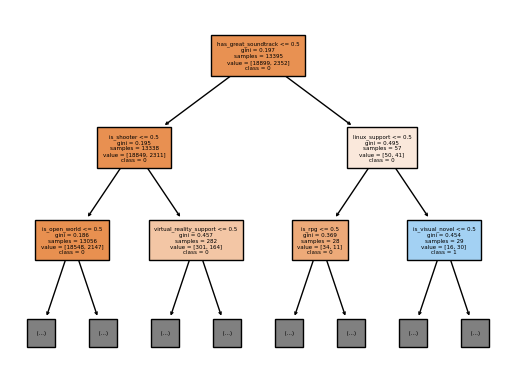

In [21]:
plot_tree(model_forest.estimators_[0], # Pull out one tree from the forest
          max_depth = 2, 
          feature_names = steam_pred_names,
          class_names = steam_resp_names, 
          filled=True,
         fontsize = 4);

In [29]:
# Get numerical feature importances
importances = list(model_forest.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(steam_pred_names, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:40} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: is_open_world                            Importance: 0.18
Variable: steam_workshop                           Importance: 0.1
Variable: multiplayer                              Importance: 0.1
Variable: is_shooter                               Importance: 0.1
Variable: free_to_play                             Importance: 0.06
Variable: mac_support                              Importance: 0.06
Variable: linux_support                            Importance: 0.06
Variable: controller_support_No                    Importance: 0.06
Variable: has_great_soundtrack                     Importance: 0.05
Variable: is_rpg                                   Importance: 0.05
Variable: is_simulation                            Importance: 0.04
Variable: singleplayer                             Importance: 0.03
Variable: is_rogue_like                            Importance: 0.03
Variable: virtual_reality_support                  Importance: 0.02
Variable: has_female_protagonist                   